# Exploratory Data Analysis


### Definiera problemet och skapa en helhetsbild
- GOOD

### Få tillgång till datan
- GOOD

### Utforska datan, gör en exploratory data analysis (EDA)
- DONE (Fixa en snygg eda senare)

### Bearbeta datan
- TODO now

### ML-modellering
- Todo

### Presentera din lösning för intressenter
- Todo

### Produktionssättning av modellen och övervakning av implementeringen
- Todo


### Imports

In [3]:
# 📌 Importera bibliotek
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Läs in data
data = pd.read_csv("stackoverflow_full.csv")

# Översikt av data
print(data.head())
print(data.info())
print(data.describe(include="all"))




   Unnamed: 0  Age Accessibility        EdLevel  Employment Gender  \
0           0  <35            No         Master           1    Man   
1           1  <35            No  Undergraduate           1    Man   
2           2  <35            No         Master           1    Man   
3           3  <35            No  Undergraduate           1    Man   
4           4  >35            No            PhD           0    Man   

  MentalHealth MainBranch  YearsCode  YearsCodePro    Country  PreviousSalary  \
0           No        Dev          7             4     Sweden         51552.0   
1           No        Dev         12             5      Spain         46482.0   
2           No        Dev         15             6    Germany         77290.0   
3           No        Dev          9             6     Canada         46135.0   
4           No     NotDev         40            30  Singapore        160932.0   

                                      HaveWorkedWith  ComputerSkills  Employed  
0          

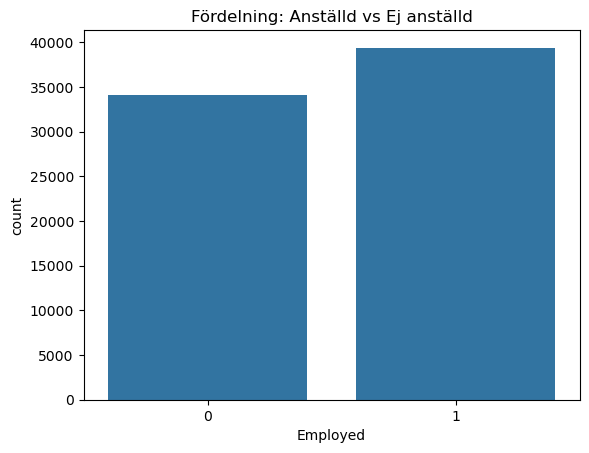

Employed
1    0.536223
0    0.463777
Name: proportion, dtype: float64


In [4]:
# --- 1. Målvariabeln (Employed) ---
sns.countplot(data=data, x="Employed")
plt.title("Fördelning: Anställd vs Ej anställd")
plt.show()

print(data["Employed"].value_counts(normalize=True))



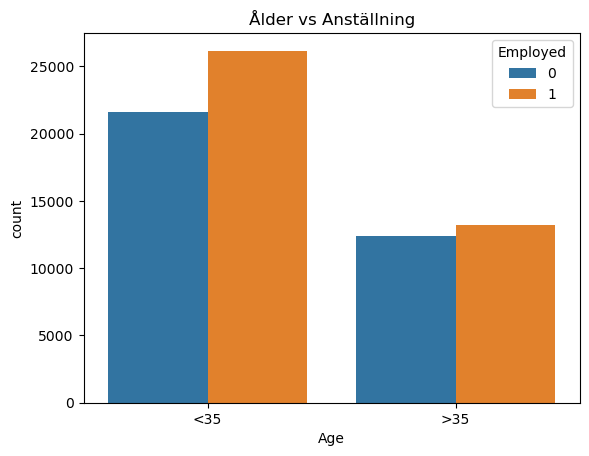

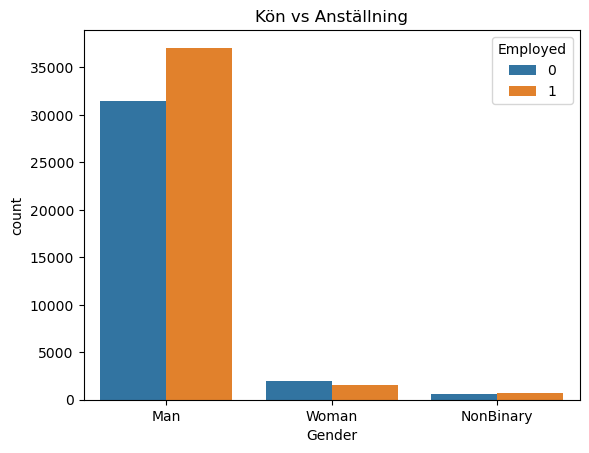

In [5]:
# --- 2. Demografiska variabler ---
# Ålder
sns.countplot(data=data, x="Age", hue="Employed")
plt.title("Ålder vs Anställning")
plt.show()

# Kön
sns.countplot(data=data, x="Gender", hue="Employed")
plt.title("Kön vs Anställning")
plt.show()



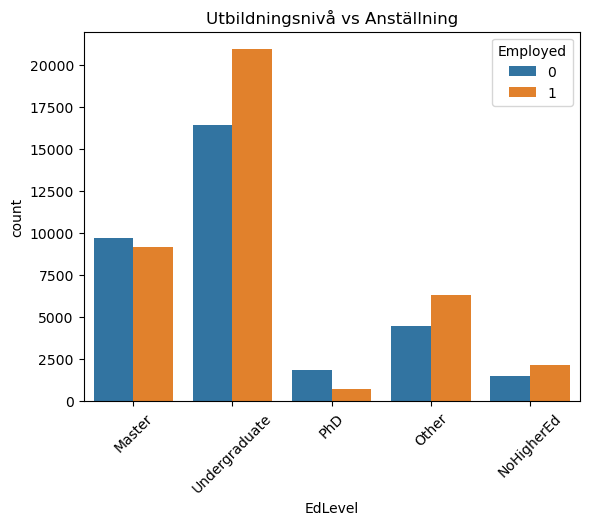

In [6]:
# --- 3. Utbildning ---
sns.countplot(data=data, x="EdLevel", hue="Employed")
plt.title("Utbildningsnivå vs Anställning")
plt.xticks(rotation=45)
plt.show()



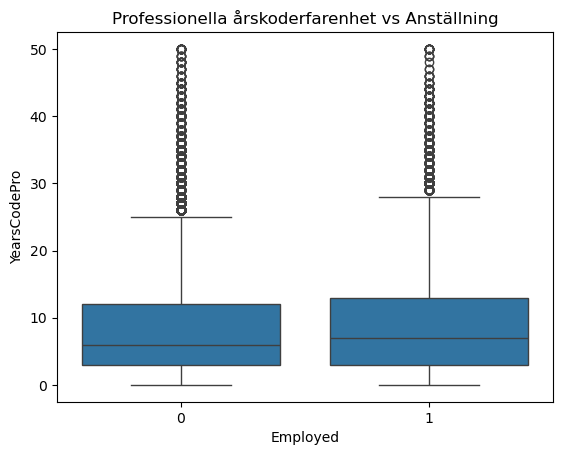

In [7]:
# --- 4. Erfarenhet ---
sns.boxplot(data=data, x="Employed", y="YearsCodePro")
plt.title("Professionella årskoderfarenhet vs Anställning")
plt.show()



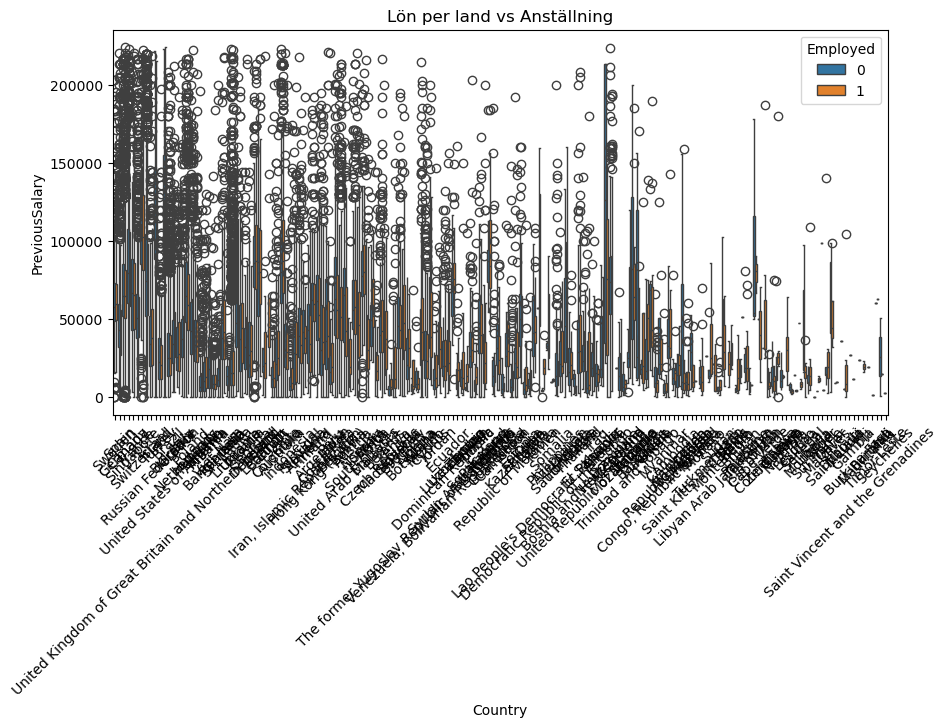

In [8]:
# --- 5. Land & Lön ---
plt.figure(figsize=(10,5))
sns.boxplot(data=data, x="Country", y="PreviousSalary", hue="Employed")
plt.title("Lön per land vs Anställning")
plt.xticks(rotation=45)
plt.show()



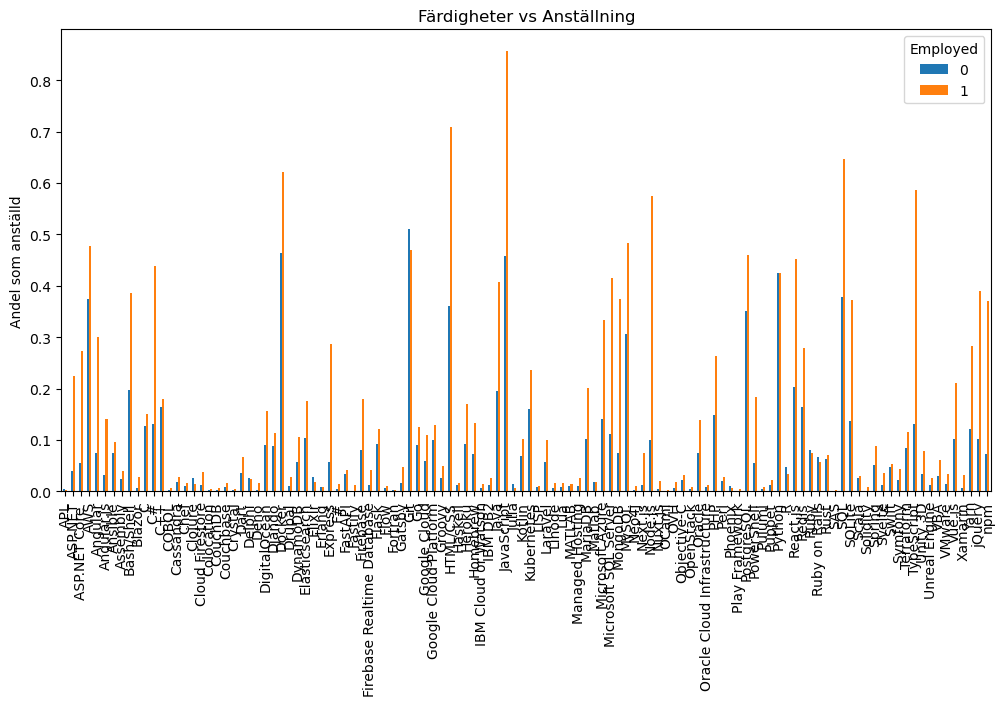

In [ ]:
# --- 6. Tekniska färdigheter ---

# Splitta HaveWorkedWith (exempelvis skapa en "one-hot-encoding")

skills = data["HaveWorkedWith"].str.get_dummies(";")
skills["Employed"] = data["Employed"]

# Visa topp-10 färdigheter
skill_corr = skills.groupby("Employed").mean().T
skill_corr.plot(kind="bar", figsize=(12,6))
plt.title("Färdigheter vs Anställning")
plt.ylabel("Andel som anställd")
plt.show()




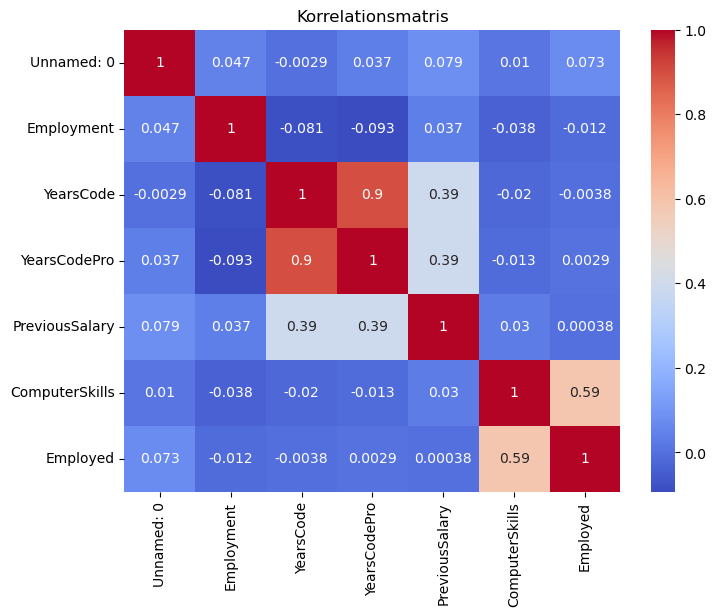

In [11]:
# --- 7. Korrelationsmatris (numeriska variabler) ---
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Korrelationsmatris")
plt.show()